In [1]:
import pro_gan_pytorch.PRO_GAN as pg
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import torch
import torchvision
import csgm
import dcgan
import skimage
import anchor_image
import image_utils

from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, save_as_images)
import torchvision.models as models
from sklearn.preprocessing import normalize

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
gen = torch.nn.DataParallel(pg.Generator(depth=9))

In [4]:
gen.load_state_dict(torch.load("GAN_GEN_SHADOW_8.pth", map_location=str(device)))

In [5]:
gen.train()

DataParallel(
  (module): Generator(
    (initial_block): GenInitialBlock(
      (conv_1): _equalized_deconv2d(512, 512, 4, 4)
      (conv_2): _equalized_conv2d(512, 512, 3, 3)
      (pixNorm): PixelwiseNorm()
      (lrelu): LeakyReLU(negative_slope=0.2)
    )
    (layers): ModuleList(
      (0): GenGeneralConvBlock(
        (conv_1): _equalized_conv2d(512, 512, 3, 3)
        (conv_2): _equalized_conv2d(512, 512, 3, 3)
        (pixNorm): PixelwiseNorm()
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (1): GenGeneralConvBlock(
        (conv_1): _equalized_conv2d(512, 512, 3, 3)
        (conv_2): _equalized_conv2d(512, 512, 3, 3)
        (pixNorm): PixelwiseNorm()
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (2): GenGeneralConvBlock(
        (conv_1): _equalized_conv2d(512, 512, 3, 3)
        (conv_2): _equalized_conv2d(512, 512, 3, 3)
        (pixNorm): PixelwiseNorm()
        (lrelu): LeakyReLU(negative_slope=0.2)
      )
      (3): GenGeneralConvBlock(
   

```
data_dir = './celebA'
img_dir = 'img_align_celeba/'
labels_dir = 'labels/'
transform = transforms.Compose([
                transforms.ToTensor()])

train_BS = 128
test_BS = 128
# datasets
test_set = celeba_utils.CelebA(data_dir,img_dir+'eval',labels_dir + 'eval.txt', transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_set, batch_size = test_BS, shuffle = False, num_workers = 4)
```

In [21]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('./*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(np.array(im))
    im.close()
    if(len(image_list) > 50):
        break

In [22]:
import cv2
t_image = image_list[0][:1024][:1024]
#img = cv2.cvtColor(t_image, cv2.COLOR_BGRA2BGR)/255
#img.shape

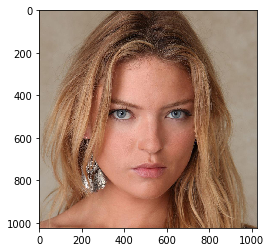

In [23]:
plt.imshow(t_image)

In [24]:
import celeba_utils
import torch
import torch.nn
from torch.autograd.gradcheck import zero_gradients
import torch.nn.functional as F
import torchvision.models as models
from PIL import Image
from torchvision import transforms
import numpy as np
import requests, io
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline

def np_dim_ran(x):
    print(x.shape, np.min(x), np.max(x))
def torch_dim_ran(x):
    print(x.shape, torch.min(x), torch.max(x))

(1024, 1024, 3) 0.0 1.0
(1024, 1024, 3) 0.0 1.0
(1024, 1024, 3) 0.0 1.0
torch.Size([1, 3, 256, 256]) tensor(-1., device='cuda:0') tensor(1., device='cuda:0')
torch.Size([1, 3, 256, 256]) tensor(0., device='cuda:0') tensor(1., device='cuda:0')
torch.Size([1, 3, 256, 256]) tensor(-1., device='cuda:0') tensor(1., device='cuda:0')


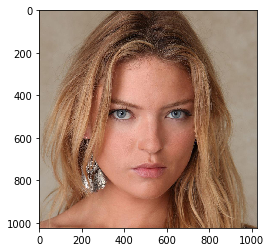

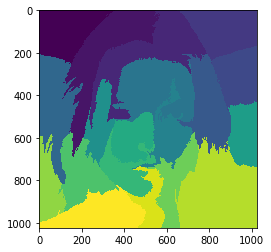

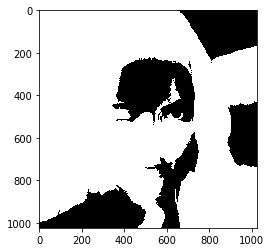

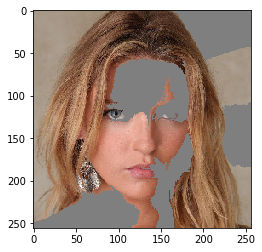

In [26]:
t_image = image_list[0][:1024][:1024]
target = t_image/255
#target = image_list[0]/255 #(np.moveaxis(test_set[np.random.randint(len(test_set))][0].numpy(),0,-1))
plt.figure()
plt.imshow(target)
print(target.shape, np.min(target), np.max(target))

segments = skimage.segmentation.slic(target, n_segments=25, compactness=10)
plt.figure()
plt.imshow(segments)

exp_ = {}
exp_['feature'] = [i for i in range(len(segments)) if np.random.rand() > .2]
_,mask = image_utils.create_mask(target,segments,exp_)
mask_exp = np.tile(np.expand_dims(mask, -1), (1, 1, 3))
np_dim_ran(mask_exp)

plt.figure()
plt.imshow(mask_exp)

plt.figure()
tmask = mask_exp * target
plt.imshow(tmask)
np_dim_ran(tmask)


#torig = torch.FloatTensor(np.moveaxis((target-.5)*2,-1,0).reshape(1,3,218,178)).cuda()
#torig = torch.nn.functional.interpolate(torig ,size=(256, 256))

#t = torch.FloatTensor(np.moveaxis((t-.5)*2,-1,0).reshape(1,3,218,178)).cuda()

#noise2 = torch.randn(1, 512).to(device)
#noise_param2 = torch.nn.Parameter(noise2)
#target_image = gen(noise2, depth=8, alpha=1).detach()
target_image = torch.FloatTensor(np.moveaxis(2*(target)-1,-1,0).reshape(1,3,1024,1024)).cuda()


mask_tensor = torch.FloatTensor(np.moveaxis(mask_exp,-1,0).reshape(1,3,1024,1024)).cuda()
mask_tensor = torch.nn.functional.interpolate(mask_tensor ,size=(256, 256))

t = torch.nn.functional.interpolate(target_image,size=(256,256))
torch_dim_ran(t)
torch_dim_ran(mask_tensor)
t = mask_tensor*t
torch_dim_ran(t)


target_image = (t.data.cpu().numpy().squeeze()+1)/2
target_image = np.moveaxis(target_image,0,-1)
plt.imshow(np.clip(target_image,0,1))

num_pixels = torch.sum(mask_tensor)

#print(torch.max(sample_image), torch.min(sample_image))
#print(torch.max(t), torch.min(t))

In [27]:
import imp
imp.reload(csgm)
x = csgm.reconstruct_celebA_batch(t, mask_tensor, G=gen,bs_=4, device=device, num_samples=1, n_pixels=num_pixels, threshold=.1)

Anchor takes:  73.0 % of image pixels
2 0.29100000000000004
tensor([0.1558, 0.2550, 0.2738, 0.4795], device='cuda:0',
       grad_fn=<DivBackward0>)
3 0.2659
tensor([0.1399, 0.2228, 0.2423, 0.4589], device='cuda:0',
       grad_fn=<DivBackward0>)
4 0.2464
tensor([0.1295, 0.2004, 0.2157, 0.4402], device='cuda:0',
       grad_fn=<DivBackward0>)
5 0.2306
tensor([0.1213, 0.1845, 0.1936, 0.4233], device='cuda:0',
       grad_fn=<DivBackward0>)
6 0.2197
tensor([0.1207, 0.1754, 0.1753, 0.4076], device='cuda:0',
       grad_fn=<DivBackward0>)
8 0.20520000000000002
tensor([0.1284, 0.1639, 0.1487, 0.3799], device='cuda:0',
       grad_fn=<DivBackward0>)
10 0.194
tensor([0.1350, 0.1516, 0.1363, 0.3533], device='cuda:0',
       grad_fn=<DivBackward0>)
11 0.1892
tensor([0.1357, 0.1484, 0.1330, 0.3400], device='cuda:0',
       grad_fn=<DivBackward0>)
13 0.17930000000000001
tensor([0.1289, 0.1445, 0.1268, 0.3172], device='cuda:0',
       grad_fn=<DivBackward0>)
15 0.1696
tensor([0.1149, 0.1414, 0.130

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3) -0.008567512 0.9710608
(256, 256, 3) -0.008567512 0.9710608
(256, 256, 3) 0.0 1.0
(256, 256, 3) -0.06431091 0.92505515
(256, 256, 3) -0.004544556 0.92505515
(256, 256, 3) -0.06431091 1.0
(256, 256, 3) 0.008461595 1.0776796
(256, 256, 3) 0.008461595 1.0776796
(256, 256, 3) 0.0 1.0
(256, 256, 3) -0.063981 0.965292
(256, 256, 3) -0.063981 0.965292
(256, 256, 3) -0.0041036606 1.0


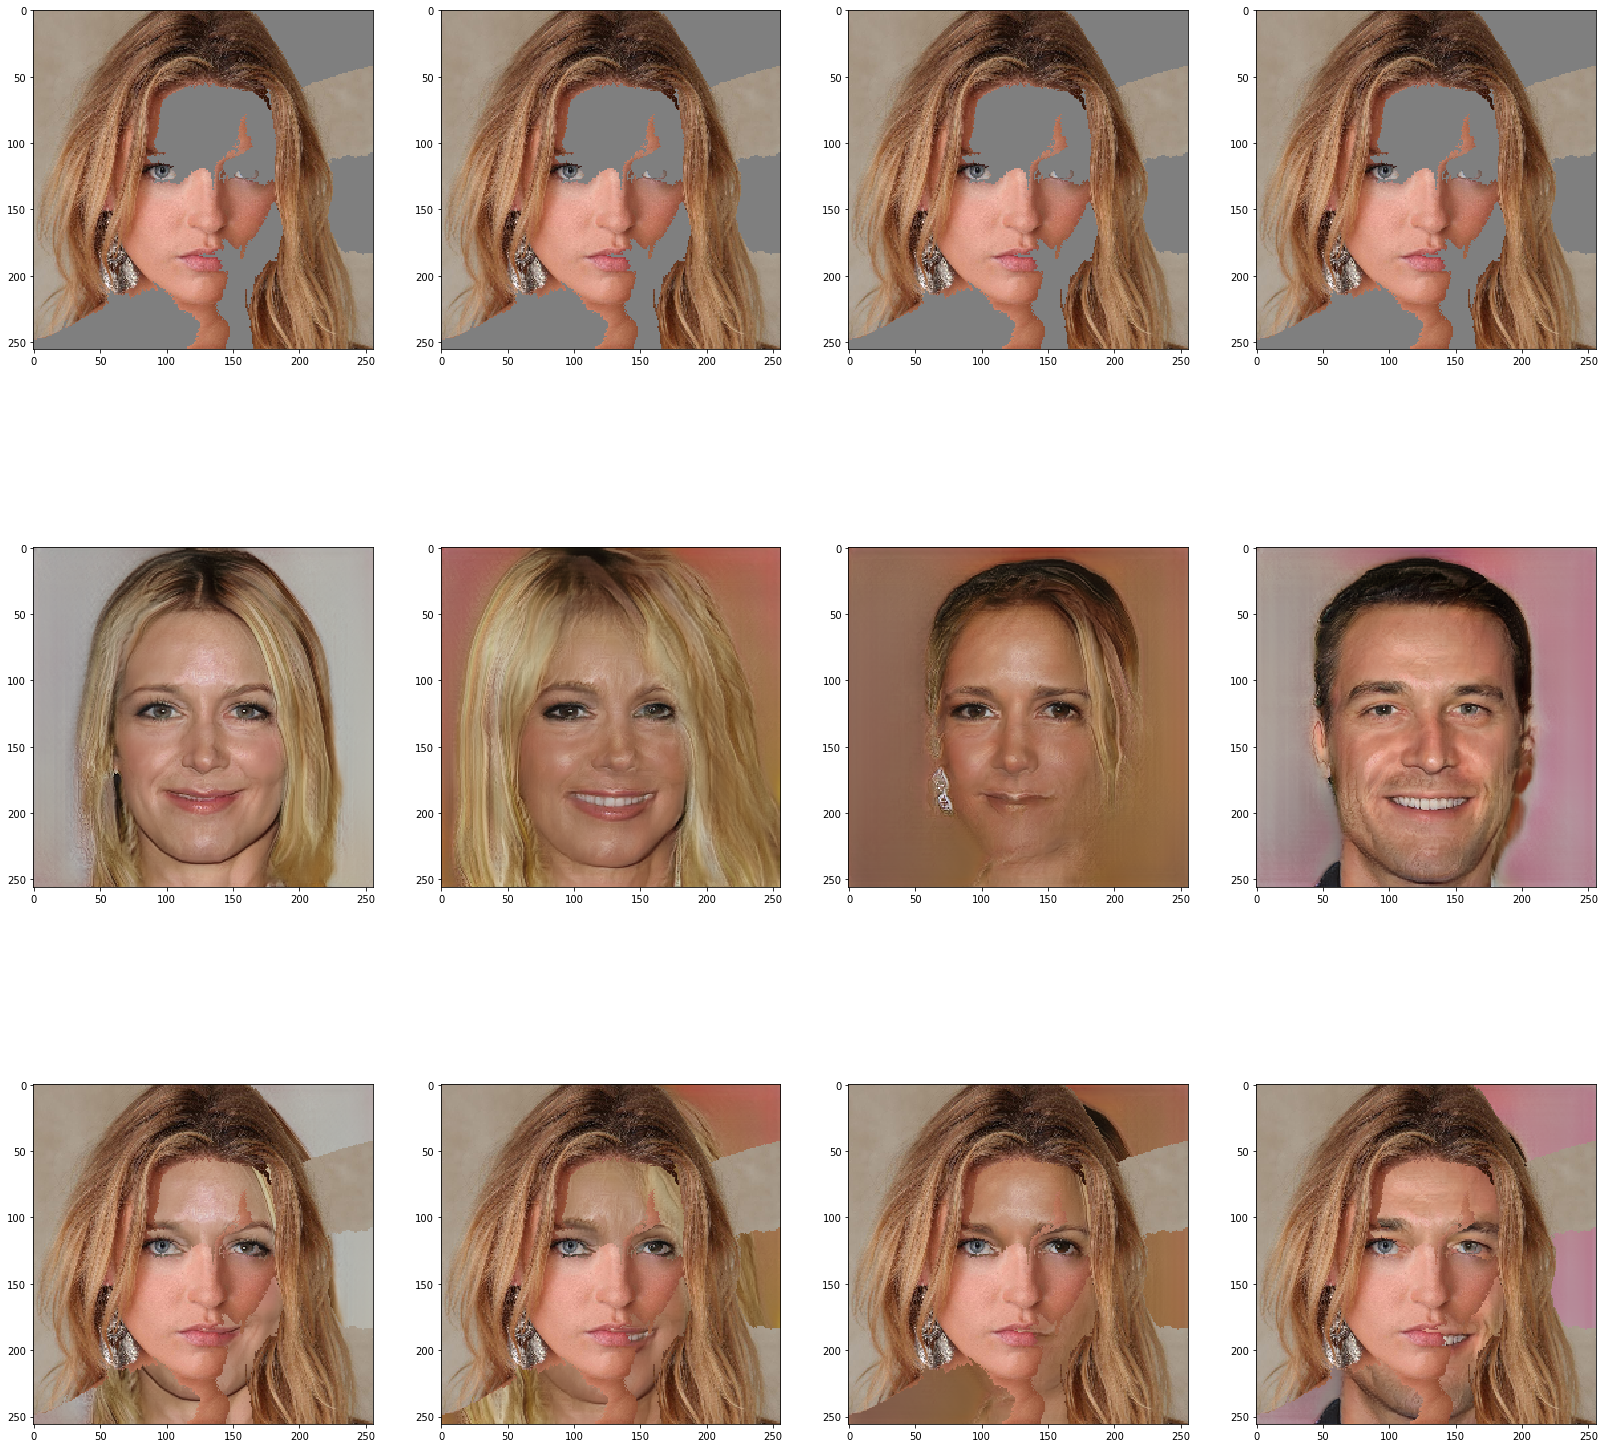

In [28]:
z, sample_image, masked_sample = x
sinp = []
msmpl = []
for i in range(len(sample_image)):
    sinp.append((np.moveaxis(sample_image[i].detach().cpu().numpy(),0,-1)+1)/2)
    msmpl.append((np.moveaxis(masked_sample[i].detach().cpu().numpy(),0,-1)+1)/2)
mtplt = (np.moveaxis(t[0].detach().cpu().numpy(),0,-1)+1)/2
f, ax = plt.subplots(3,len(sinp),figsize = (28,28))
for i in range(len(sinp)):
    ax[0][i].imshow(mtplt)
    ax[1][i].imshow(sinp[i])
    ax[2][i].imshow(sinp[i] - msmpl[i] + mtplt)
    np_dim_ran(sinp[i])
    np_dim_ran(msmpl[i])
    np_dim_ran(sinp[i] - msmpl[i] + mtplt)

In [9]:
def np_dim_ran(x):
    print(x.shape, np.min(x), np.max(x))
def torch_dim_ran(x):
    print(x.shape, torch.min(x), torch.max(x))

(1024, 976, 3) 0.0 1.0
(1024, 976, 3) 0.0 1.0
(1024, 976, 3) 0.0 1.0


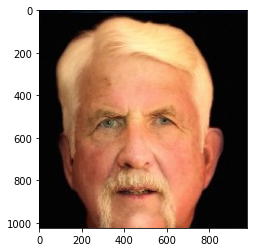

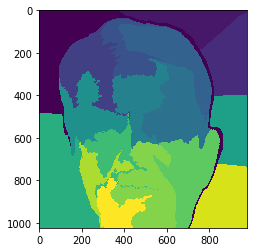

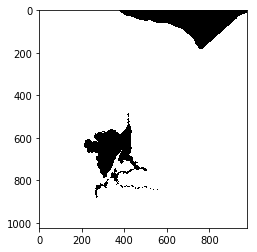

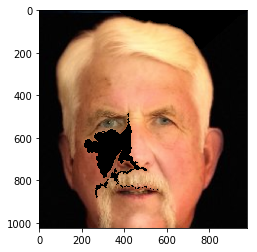

In [284]:
t_image = image_list[0][:1024][:1024]
target = cv2.cvtColor(t_image, cv2.COLOR_BGRA2BGR)/255
#target = image_list[0]/255 #(np.moveaxis(test_set[np.random.randint(len(test_set))][0].numpy(),0,-1))
plt.figure()
plt.imshow(target)
print(target.shape, np.min(target), np.max(target))

segments = skimage.segmentation.slic(target, n_segments=25, compactness=10)
plt.figure()
plt.imshow(segments)

exp_ = {}
exp_['feature'] = [i for i in range(len(segments)) if np.random.rand() > .2]
_,mask = image_utils.create_mask(target,segments,exp_)
mask_exp = np.tile(np.expand_dims(mask, -1), (1, 1, 3))
np_dim_ran(mask_exp)

plt.figure()
plt.imshow(mask_exp)

plt.figure()
tmask = mask_exp * target
plt.imshow(tmask)
np_dim_ran(tmask)

torch.Size([1, 3, 256, 256]) tensor(-1., device='cuda:0') tensor(1., device='cuda:0')
torch.Size([1, 3, 256, 256]) tensor(0., device='cuda:0') tensor(1., device='cuda:0')
torch.Size([1, 3, 256, 256]) tensor(-1., device='cuda:0') tensor(1., device='cuda:0')


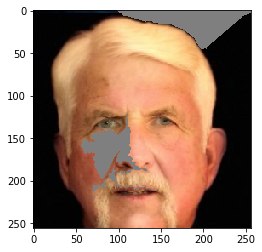

In [285]:


#torig = torch.FloatTensor(np.moveaxis((target-.5)*2,-1,0).reshape(1,3,218,178)).cuda()
#torig = torch.nn.functional.interpolate(torig ,size=(256, 256))

#t = torch.FloatTensor(np.moveaxis((t-.5)*2,-1,0).reshape(1,3,218,178)).cuda()

#noise2 = torch.randn(1, 512).to(device)
#noise_param2 = torch.nn.Parameter(noise2)
#target_image = gen(noise2, depth=8, alpha=1).detach()
target_image = torch.FloatTensor(np.moveaxis(2*(target)-1,-1,0).reshape(1,3,1024,976)).cuda()


mask_tensor = torch.FloatTensor(np.moveaxis(mask_exp,-1,0).reshape(1,3,1024,976)).cuda()
mask_tensor = torch.nn.functional.interpolate(mask_tensor ,size=(256, 256))

t = torch.nn.functional.interpolate(target_image,size=(256,256))
torch_dim_ran(t)
torch_dim_ran(mask_tensor)
t = mask_tensor*t
torch_dim_ran(t)


target_image = (t.data.cpu().numpy().squeeze()+1)/2
target_image = np.moveaxis(target_image,0,-1)
plt.imshow(np.clip(target_image,0,1))

#print(torch.max(sample_image), torch.min(sample_image))
#print(torch.max(t), torch.min(t))

In [266]:
bs = 1
noise1 = torch.randn(bs, 512).to(device)
noise_param1 = torch.nn.Parameter(noise1)
num_pixels = torch.sum(mask_tensor)
print("Anchor takes: ", (num_pixels/(3*(256**2))).item()*100//1,"% of image pixels")
opt = torch.optim.Adam(lr=1e-2, params=[noise_param1])
batch_loss = 1
lastloss=1
itr_count = 0
while batch_loss > .1:
    itr_count += 1
    if (lastloss * 100) // 1 != (batch_loss * 100) // 1:
        print(itr_count, (batch_loss.item()*10000)//1 * .0001)
        print((loss1/(num_pixels/3)))
    lastloss=batch_loss
    sample_image = torch.nn.functional.interpolate(gen(noise_param1, depth=8, alpha=1), scale_factor=1/4)
    masked_sample = mask_tensor*sample_image
    e = (masked_sample - t)
    se = e ** 2
    loss1 = torch.sum(torch.sum(torch.mean(se,dim=1),dim=-1),dim=-1)
    #print((loss1/(num_pixels/3)))
    batch_loss = loss1.sum()/(num_pixels*bs/3)
    #loss2 = torch.sum(se)/num_pixels
    #print(loss1.item() // .0001 ==  loss2.item() //.0001)
    batch_loss.backward()
    opt.step()

Anchor takes:  84.0 % of image pixels
2 1.0164
tensor([1.0165], device='cuda:0', grad_fn=<DivBackward0>)
3 0.9039
tensor([0.9040], device='cuda:0', grad_fn=<DivBackward0>)
4 0.8037000000000001
tensor([0.8037], device='cuda:0', grad_fn=<DivBackward0>)
5 0.7186
tensor([0.7186], device='cuda:0', grad_fn=<DivBackward0>)
6 0.6629
tensor([0.6629], device='cuda:0', grad_fn=<DivBackward0>)
7 0.6253000000000001
tensor([0.6254], device='cuda:0', grad_fn=<DivBackward0>)
8 0.5916
tensor([0.5916], device='cuda:0', grad_fn=<DivBackward0>)
9 0.5575
tensor([0.5576], device='cuda:0', grad_fn=<DivBackward0>)
10 0.5176000000000001
tensor([0.5176], device='cuda:0', grad_fn=<DivBackward0>)
11 0.47390000000000004
tensor([0.4740], device='cuda:0', grad_fn=<DivBackward0>)
12 0.4278
tensor([0.4279], device='cuda:0', grad_fn=<DivBackward0>)
13 0.3805
tensor([0.3806], device='cuda:0', grad_fn=<DivBackward0>)
14 0.3392
tensor([0.3393], device='cuda:0', grad_fn=<DivBackward0>)
15 0.3128
tensor([0.3129], device='cu

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3) -0.1324681 1.0382347
(256, 256, 3) -0.0460245 1.0105374
(256, 256, 3) -0.1324681 1.0382347
(256, 256, 3) -0.038881242 0.973752
(256, 256, 3) 0.0011376739 0.8377986
(256, 256, 3) -0.038881242 0.9843137
(256, 256, 3) -0.05718887 0.98706985
(256, 256, 3) 0.012079537 0.96165854
(256, 256, 3) -0.05718887 0.98706985
(256, 256, 3) -0.043338 1.0007596
(256, 256, 3) -0.032607913 0.9421514
(256, 256, 3) -0.043338 1.0007596


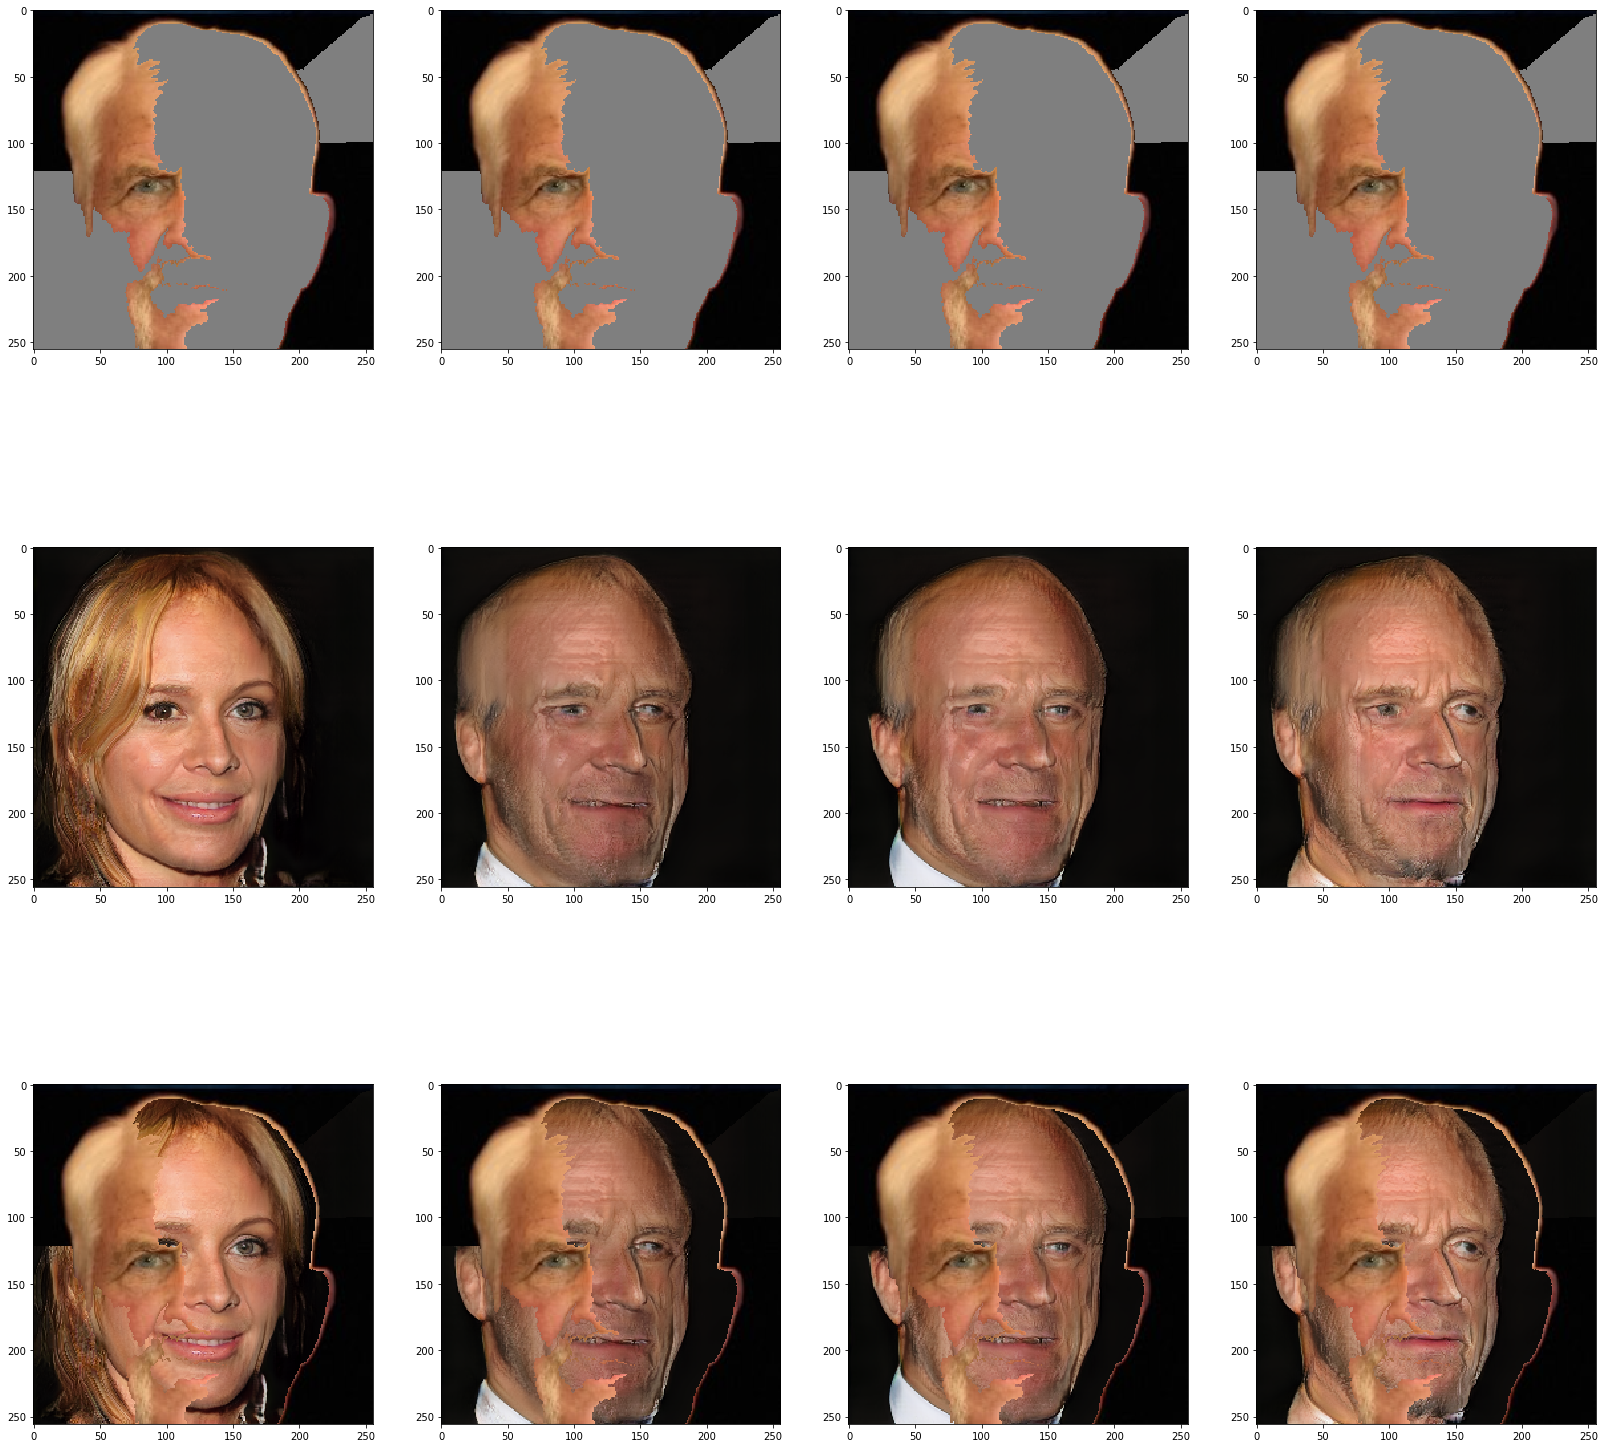

In [250]:
sinp = []
msmpl = []
for i in range(len(sample_image)):
    sinp.append((np.moveaxis(sample_image[i].detach().cpu().numpy(),0,-1)+1)/2)
    msmpl.append((np.moveaxis(masked_sample[i].detach().cpu().numpy(),0,-1)+1)/2)
mtplt = (np.moveaxis(t[0].detach().cpu().numpy(),0,-1)+1)/2
f, ax = plt.subplots(3,len(sinp),figsize = (28,28))
for i in range(len(sinp)):
    ax[0][i].imshow(mtplt)
    ax[1][i].imshow(sinp[i])
    ax[2][i].imshow(sinp[i] - msmpl[i] + mtplt)
    np_dim_ran(sinp[i])
    np_dim_ran(msmpl[i])
    np_dim_ran(sinp[i] - msmpl[i] + mtplt)

    
#plt.imshow(sinp - msmpl + mtplt)
#print(mtplt.shape)
#plt.figure()
#plt.imshow(mtplt)
#plt.imshow((sinp - tx)**2)
#plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


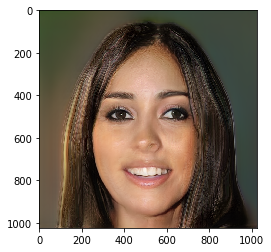

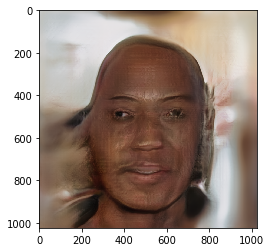

In [157]:
noise2 = torch.randn(2, 512).to(device)
noise_param2 = torch.nn.Parameter(noise2)
target_image = gen(noise2, depth=8, alpha=1).detach()
timp1 = (np.moveaxis(target_image[1].detach().cpu().numpy(),0,-1)+1)/2
timp2 = (np.moveaxis(target_image[0].detach().cpu().numpy(),0,-1)+1)/2
plt.imshow(timp1)
plt.figure()
plt.imshow(timp2)

In [132]:
ms = (np.moveaxis(masked_sample[0].detach().cpu().numpy(),0,-1)+1)/2
sinp = (np.moveaxis(sample_image[0].detach().cpu().numpy(),0,-1)+1)/2
eplt = (np.moveaxis(e[0].detach().cpu().numpy(),0,-1)+1)/2
seplt = (np.moveaxis(se[0].detach().cpu().numpy(),0,-1)+1)/2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

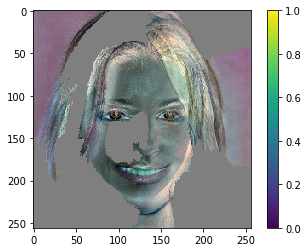

In [133]:
plt.figure()
#plt.imshow(sinp)
plt.figure()
#plt.imshow(ms)
plt.figure()
plt.imshow(eplt)
plt.colorbar()

In [316]:
se

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0',
       grad_fn=<PowBackward0>)

In [317]:
np.min(seplt)

0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


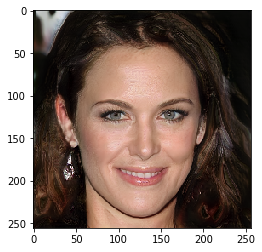

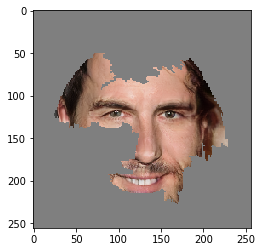

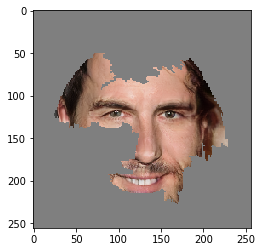

In [484]:
sinp = (np.moveaxis(sample_image[0].detach().cpu().numpy(),0,-1)+1)/2
mtplt = (np.moveaxis(t[0].detach().cpu().numpy(),0,-1)+1)/2
plt.figure()
plt.imshow(sinp)
plt.figure()
plt.imshow(target_image)
print(mtplt.shape)
plt.figure()
plt.imshow(mtplt)
#plt.imshow((sinp - tx)**2)
#plt.colorbar()


In [71]:
sample_image.shape

torch.Size([1, 3, 1, 3])

In [59]:
t.shape

(218, 178, 3)

In [ ]:
target